In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

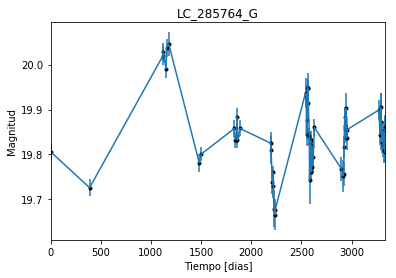

In [2]:
data = np.genfromtxt('LC_285764_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_285764_G')
plt.savefig("LC_285764_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

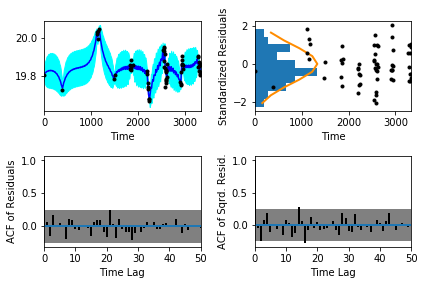

In [5]:
sample.assess_fit()

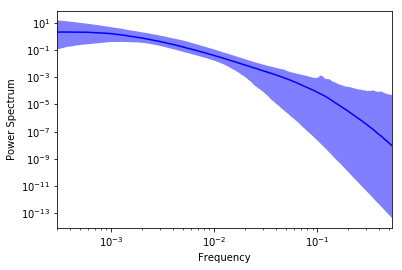

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

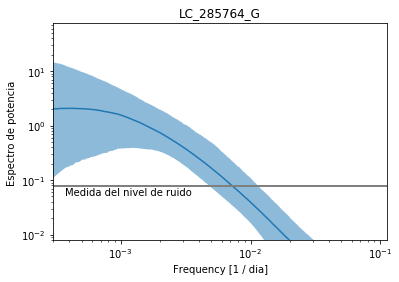

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_G')

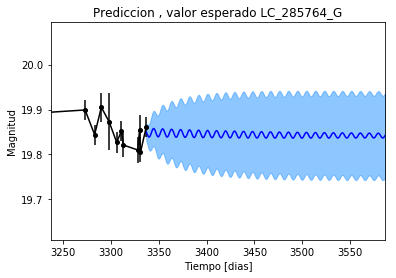

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_G')

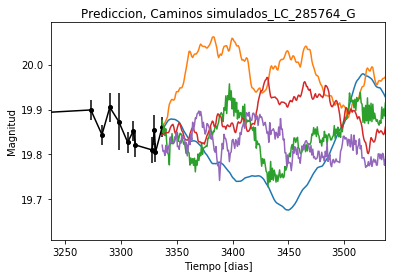

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


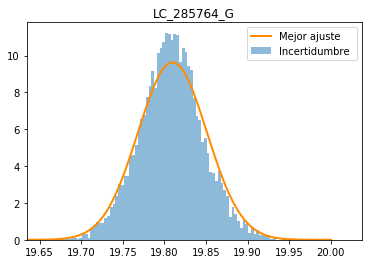

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_G')
plt.savefig("Mejor_ajuste_LC_285764_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_G')

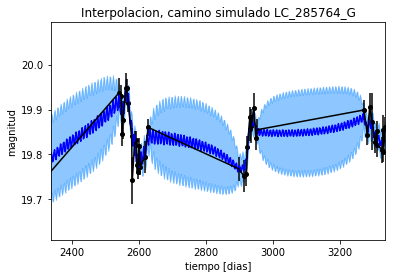

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_G')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_G')

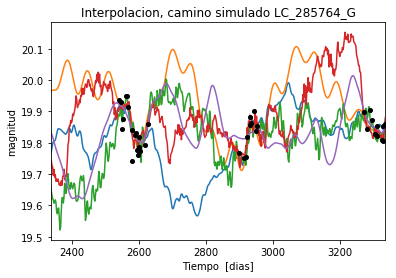

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 560.214613443
Median: 0.0424652531121
Standard deviation: 0.218918998721
68% credibility interval: [ 0.00344736  0.31025942]
95% credibility interval: [  5.29233519e-04   8.40691024e-01]
99% credibility interval: [  3.31186366e-04   1.01426097e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 427.19267263
Median: 0.0119272882096
Standard deviation: 0.11353456809
68% credibility interval: [ 0.00114568  0.10104042]
95% credibility interval: [  3.69090904e-04   3.95845699e-01]
99% credibility interval: [  3.10839659e-04   7.30750076e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 473.686735457
Median: 0.0698255344207
Sta

In [21]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 558.439030332
Median: 130.564146671
Standard deviation: 1.87797237969
68% credibility interval: [ 128.4304778   132.02748382]
95% credibility interval: [ 125.80443796  132.97448765]
99% credibility interval: [ 123.77664906  133.57757549]


In [22]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1136.15790592
Median: 1.5485066399
Standard deviation: 2.56330537545
68% credibility interval: [ 0.24210304  5.30998239]
95% credibility interval: [ 0.06003372  8.74386074]
99% credibility interval: [  0.02131947  11.2980987 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 931.106236228
Median: 2.77345360683
Standard deviation: 11.4760049558
68% credibility interval: [  0.26487933  18.06019115]
95% credibility interval: [  1.46257828e-

In [23]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 230.938613381
Median: 1.28308838674e-31
Standard deviation: 3.899956008e+55
68% credibility interval: [  1.29086836e-78   6.58529672e+04]
95% credibility interval: [  1.96341367e-140   2.04422928e+029]
99% credibility interval: [  3.45482036e-157   1.74444798e+056]


In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2686.74084171
Median: 19.8404522721
Standard deviation: 0.0403716756327
68% credibility interval: [ 19.80783459  19.87484942]
95% credibility interval: [ 19.7605669   19.92480819]
99% credibility interval: [ 19.70350649  19.96819469]


In [25]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 215.899603209
Median: 0.103652678862
Standard deviation: 0.287240755263
68% credibility interval: [ 0.          0.56571756]
95% credibility interval: [ 0.         0.9534403]
99% credibility interval: [ 0.          1.04147435]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 215.899603209
Median: 0.103652678862
Standard deviation: 0.287240755263
68% credibility interval: [ 0.          0.56571756]
95% credibility interval: [ 0.         0.9534403]
99% credibility interval: [ 0.          1.04147435]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1074.28602784
Median: 0.0
Standard deviation: 0.000809689656674
68% credibil

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 558.439030332
Median: 130.564146671
Standard deviation: 1.87797237969
68% credibility interval: [ 128.4304778   132.02748382]
95% credibility interval: [ 125.80443796  132.97448765]
99% credibility interval: [ 123.77664906  133.57757549]


In [27]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2403.86629706
Median: 0.0103933625553
Standard deviation: 0.00784563274754
68% credibility interval: [ 0.00665888  0.01803293]
95% credibility interval: [ 0.00470177  0.03267453]
99% credibility interval: [ 0.00381461  0.05063419]


In [28]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1154.52599788
Median: 1.0714183311
Standard deviation: 0.201580409911
68% credibility interval: [ 0.89141462  1.28857021]
95% credibility interval: [ 0.75826761  1.53317208]
99% credibility interval: [ 0.67979554  1.71471158]


In [29]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 945.50909395
Median: 0.00368803905618
Standard deviation: 0.222806502763
68% credibility interval: [  9.98345248e-07   8.94446712e-02]
95% credibility interval: [  8.92753197e-32   6.40515482e-01]
99% credibility interval: [  8.03482388e-59   1.52121000e+00]


In [30]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 560.214613443
Median: (-0.26681705442-1.27178767126j)
Standard deviation: 2.26920244531
68% credibility interval: [-1.9494174+0.j         -0.0216604-0.48543746j]
95% credibility interval: [ -5.28221749e+00-4.98387464j  -3.32527227e-03-4.38648171j]
99% credibility interval: [ -6.37278963e+00-4.61102227j  -2.08090531e-03-3.47544008j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 427.19267263
Median: (-0.0749413620328+0.86066375224j)
Standard deviation: 1.94065360311
68% credibility interval: [-0.63485568+1.45249927j -0.00719853+0.47634633j]
95% credibility interval: [ -2.48717188e+00+2.44403313j  -2.31906655e-03+0.j        ]
99% credibility interval: [ -4.59143814e+00+3.63260579j  -1.95306318e-03+5.89476198j]
Posterior